**Implementation of Decision Tree**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv("/content/drive/MyDrive/Concept&Tech-AI/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# dimensions of dataset
df.shape

(768, 9)

In [5]:
# top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# frequency of values in variables
col_names = df.columns
for col in col_names:
    print(df[col].value_counts())


Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
2

In [11]:
# check missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
# declare feature vector (X) and target variable (y)
X = df.drop(columns=['Outcome'])

y = df['Outcome']

In [14]:
# split data into seperate training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((537, 8), (231, 8))

In [16]:
X_train.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64


**Case I : Gini criterion index**

In [20]:
# train the DecisionTreeClassifier model with 'Gini' criterion index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
# accuracy for test set
y_pred_gini = clf_gini.predict(X_test)

print("Model accuracy score with criterion gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

In [23]:
# accuracy for training set

y_pred_train_gini = clf_gini.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7635


In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7635
Test set score: 0.7186


[Text(0.5, 0.875, 'x[1] <= 154.5\ngini = 0.455\nsamples = 537\nvalue = [349, 188]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.383\nsamples = 454\nvalue = [337, 117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 127.5\ngini = 0.22\nsamples = 238\nvalue = [208, 30]'),
 Text(0.0625, 0.125, 'gini = 0.117\nsamples = 192\nvalue = [180, 12]'),
 Text(0.1875, 0.125, 'gini = 0.476\nsamples = 46\nvalue = [28, 18]'),
 Text(0.375, 0.375, 'x[5] <= 26.95\ngini = 0.481\nsamples = 216\nvalue = [129, 87]'),
 Text(0.3125, 0.125, 'gini = 0.13\nsamples = 43\nvalue = [40, 3]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 173\nvalue = [89, 84]'),
 Text(0.75, 0.625, 'x[5] <= 28.7\ngini = 0.247\nsamples = 83\nvalue = [12, 71]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 25.35\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.875, 0.375, 'x[

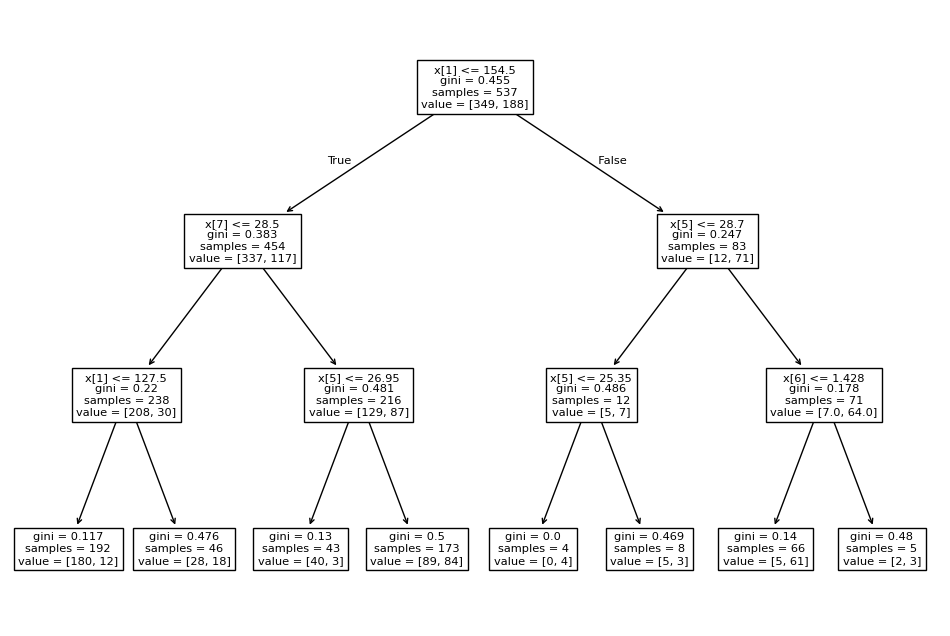

In [25]:
# visualize decision-tree

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

**Case II : Scikit Learn**

In [19]:
# train the Scikit-learn decision tree

sklearn_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
sklearn_tree.fit(X_train, y_train)

# predict on the test set
y_pred_sklearn = sklearn_tree.predict(X_test)

# calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn Decision Tree Accuracy: {accuracy_sklearn:.4f}")


Scikit-learn Decision Tree Accuracy: 0.7186


In [26]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sklearn)
print('Confusion Matrix\n',cm)

Confusion Matrix
 [[141  10]
 [ 55  25]]


In [28]:
# classification report [precision, recall, f1-score and support]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_sklearn))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       151
           1       0.71      0.31      0.43        80

    accuracy                           0.72       231
   macro avg       0.72      0.62      0.62       231
weighted avg       0.72      0.72      0.68       231



**Implementation of Logistic Regression**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [44]:
# load the dataset

data = pd.read_csv("/content/drive/MyDrive/Concept&Tech-AI/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
# column names

col_names = data.columns
col_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
data.shape

(143, 9)

In [54]:
# declare feature vector (X) and target variable (y)

X = data.drop(columns=['Outcome']).values

y = data['Outcome'].values

In [75]:
# split data into seperate training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

In [61]:
# standardize features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# model train

model = LogisticRegression(max_iter = 1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [70]:
y_pred = model.predict(X_test_scaled)

In [74]:
# evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)

cr = classification_report(y_test, y_pred)
print('\nClassification Report:\n', cr)

Accuracy: 71.43%

Confusion Matrix:
 [[82 18]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

